<a id = "1.0"></a>
<p style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:center;border-radius:5px 5px;">
<strong>_____________________________________________________________</strong></p> 

<a id = "1.0"></a>
<p style="font-size:25px;color:#34656d;font-family:'Comic Sans MS';text-align:center;border-radius:5px 5px;">
<strong>Series de Tiempo</strong></p> 

In [1]:
import fbprophet
print('Prophet %s' % fbprophet.__version__)

Prophet 0.7.1


In [25]:
from fbprophet import Prophet

In [26]:
from pandas import to_datetime
from pandas import DataFrame
from pandas import read_csv

<a id = "1.0"></a>
<p style="font-size:20px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<strong>Cargar File</strong></p> 

In [27]:
df = read_csv('./data/monthly-car-sales.csv', header=0)

In [28]:
df.shape

(108, 2)

<a id = "1.0"></a>
<p style="font-size:20px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<strong>Dataset</strong></p> 

In [29]:
df.head()

,Month,Sales
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587


In [30]:
df.tail()

,Month,Sales
103,1968-08,16722
104,1968-09,14385
105,1968-10,21342
106,1968-11,17180
107,1968-12,14577


<a id = "1.0"></a>
<p style="font-size:20px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<strong>Plot</strong></p> 

<AxesSubplot:>

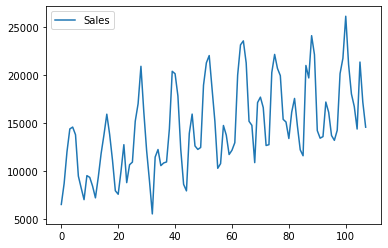

In [31]:
df.plot()

<a id = "1.0"></a>
<p style="font-size:20px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<strong>Renombrar Columnas</strong></p> 

<a id = "1.0"></a>
<p style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<strong>FbProthet necesita que estas dos columas existan</strong></p> 

In [32]:
df.columns = ['ds', 'y']

In [33]:
df.head()

,ds,y
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587


<a id = "1.0"></a>
<p style="font-size:20px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<strong>Convertir la Columna ds a DateTime</strong></p> 

In [34]:
df['ds']= to_datetime(df['ds'])

In [35]:
df.head()

,ds,y
0,1960-01-01,6550
1,1960-02-01,8728
2,1960-03-01,12026
3,1960-04-01,14395
4,1960-05-01,14587


<a id = "1.0"></a>
<p style="font-size:20px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<strong>Cargar Modelo</strong></p> 

In [36]:
model = Prophet()

<a id = "1.0"></a>
<p style="font-size:20px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<strong>Entrenar el Modelo</strong></p> 

In [37]:
model.fit(df);

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<a id = "1.0"></a>
<p style="font-size:20px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<strong>Se genera una lista de fechas hacia adelante</strong></p> 

In [38]:
future = list()
for i in range(1, 13):
    date = f'1969-%02d' % i
    future.append([date])

<a id = "1.0"></a>
<p style="font-size:20px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<strong>Se crea el DataFrame</strong></p> 

In [39]:
future = DataFrame(future)

In [40]:
future

,0
0,1969-01
1,1969-02
2,1969-03
3,1969-04
4,1969-05
5,1969-06
6,1969-07
7,1969-08
8,1969-09
9,1969-10


<a id = "1.0"></a>
<p style="font-size:20px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<strong>Se genera el formato de entrada</strong></p> 

In [41]:
future.columns = ['ds']
future['ds']= to_datetime(future['ds'])

In [42]:
future

,ds
0,1969-01-01
1,1969-02-01
2,1969-03-01
3,1969-04-01
4,1969-05-01
5,1969-06-01
6,1969-07-01
7,1969-08-01
8,1969-09-01
9,1969-10-01


<a id = "1.0"></a>
<p style="font-size:20px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<strong>Predecir</strong></p> 

In [43]:
forecast = model.predict(future)

<a id = "1.0"></a>
<p style="font-size:20px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<strong>Grafica de la predicción</strong></p> 

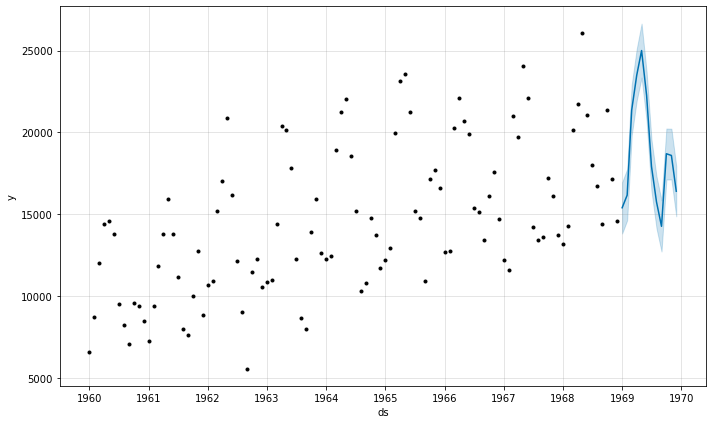

In [44]:
fig1 =model.plot(forecast)

<a id = "1.0"></a>
<p style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:center;border-radius:5px 5px;">
<strong>_____________________________________________________________</strong></p> 

<a id = "1.0"></a>
<p style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:center;border-radius:5px 5px;">
<strong>_____________________________________________________________</strong></p> 